## Creacion del entorno virtual

Se crea un virtual enviroment de Python 3.11.5 llamado VC_P1 donde se instalan los paquetes opencv-python y matplotlib ademas de las dependencias de ipykernel.

In [3]:
conda create --name VC_P1 python=3.11.5 -y
conda activate VC_P1
pip install opencv-python
pip install matplotlib
conda install -n VC_P1 ipykernel --update-deps --force-reinstall -y

SyntaxError: invalid syntax (1939664038.py, line 1)

## Inicializaciones

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

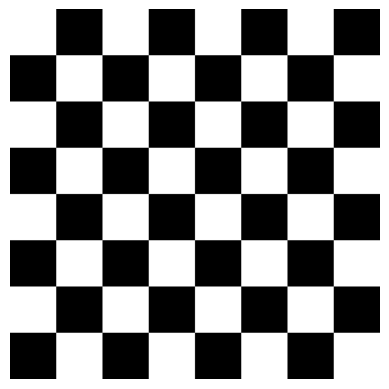

Dimensiones (Alto, Ancho): (800, 800)


In [ ]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800
square = 100

# Crear una grilla de índices
rows = np.arange(alto) // square
cols = np.arange(ancho) // square

# Generar patrón tipo tablero de ajedrez usando broadcasting
gray_img = ((rows[:, None] + cols[None, :]) % 2 == 0).astype(np.uint8) * 255

# Visualizar
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

print(f"Dimensiones (Alto, Ancho): {gray_img.shape}")

## TAREA 2: Crea una imagen estilo Mondrian

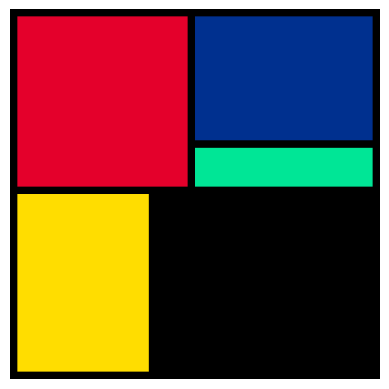

In [ ]:
# Parámetros
width, height = 400, 400
color_img = np.zeros((height, width, 3), dtype=np.uint8)  # fondo negro inicial

# Función auxiliar para pintar rectángulos
def draw_rect(img, x1, y1, x2, y2, color):
    img[y1:y2, x1:x2] = color

# Colores estilo Mondrian (RGB)
RED    = (228, 0, 43)
GREEN   = (0, 230, 150)
BLUE   = (0, 48, 143)
YELLOW = (255, 221, 0)
BLACK  = (0, 0, 0)

# Composición que cubre toda la imagen
draw_rect(color_img,   0,   0, 200, 200, RED)
draw_rect(color_img, 200,   0, 400, 150, BLUE)
draw_rect(color_img,   0, 200, 150, 400, YELLOW)
draw_rect(color_img, 150, 200, 400, 400, BLACK)
draw_rect(color_img, 200, 150, 400, 200, GREEN)

# Líneas negras (imitando bordes gruesos)
line_thickness = 8
color_img[200-line_thickness:200, :] = (0,0,0)
color_img[:, 200-line_thickness:200] = (0,0,0)
color_img[150-line_thickness:150, 200:400] = (0,0,0)
color_img[:, 400-line_thickness:] = (0,0,0)
color_img[400-line_thickness:, :] = (0,0,0)
color_img[:line_thickness, :] = (0,0,0)
color_img[:, :line_thickness] = (0,0,0)

# Mostrar resultado
plt.imshow(color_img)
plt.axis("off")
plt.show()

## TAREA 3: Hacer uso de las funciones de dibujo de OpenCV

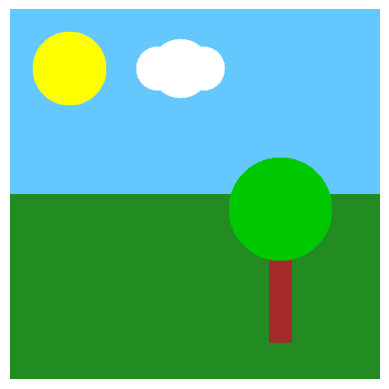

In [ ]:
# Crear lienzo
width, height = 500, 500
img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Colores (BGR)
BLUE   = (255, 200, 100)   # cielo
GREEN  = (34, 139, 34)     # campo
YELLOW = (0, 255, 255)     # sol
WHITE  = (255, 255, 255)   # nubes
BROWN  = (42, 42, 165)     # tronco

# Cielo
cv2.rectangle(img, (0, 0), (width, height//2), BLUE, -1)

# Campo
cv2.rectangle(img, (0, height//2), (width, height), GREEN, -1)

# Sol
cv2.circle(img, (80, 80), 50, YELLOW, -1)

# Tronco de un árbol
cv2.rectangle(img, (350, 300), (380, 450), BROWN, -1)

# Copa del árbol
cv2.circle(img, (365, 270), 70, (0, 200, 0), -1)

# Nubes
cv2.circle(img, (200, 80), 30, WHITE, -1)
cv2.circle(img, (230, 80), 40, WHITE, -1)
cv2.circle(img, (260, 80), 30, WHITE, -1)

# Mostrar usando matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


## TAREA 4: Modifica de forma libre los valores de un plano de la imagen

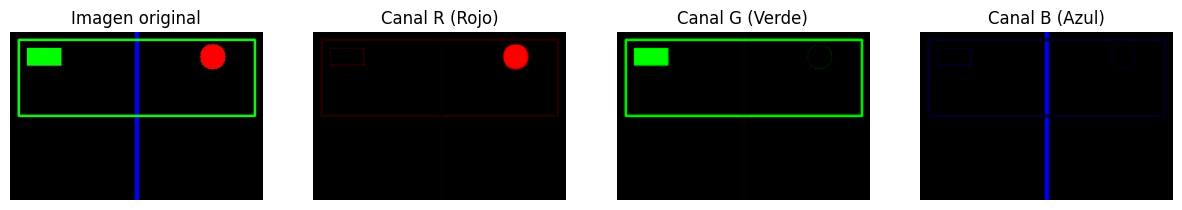

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen (usa la tuya en lugar de 'imagen.jpg')
img = cv2.imread("imagen.jpg")

# Separar canales BGR
B, G, R = cv2.split(img)

# Crear imágenes que muestran cada canal en su color
zeros = np.zeros_like(B)

red_img   = cv2.merge([zeros, zeros, R])  # Solo canal R
green_img = cv2.merge([zeros, G, zeros])  # Solo canal G
blue_img  = cv2.merge([B, zeros, zeros])  # Solo canal B

# Mostrar resultados
fig, axs = plt.subplots(1, 4, figsize=(15,5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
axs[1].set_title("Canal R (Rojo)")
axs[1].axis("off")

axs[2].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
axs[2].set_title("Canal G (Verde)")
axs[2].axis("off")

axs[3].imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
axs[3].set_title("Canal B (Azul)")
axs[3].axis("off")

plt.show()

  

## TAREA 5: Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

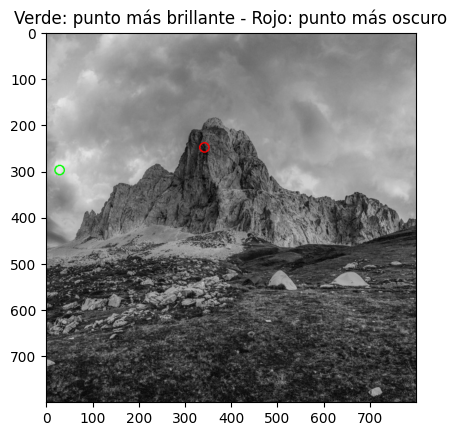

Punto más oscuro: 0.0 en (342, 249)
Punto más claro: 235.0 en (29, 298)


In [ ]:
image = cv2.imread("paisaje.jpg", cv2.IMREAD_GRAYSCALE)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(image)

img_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

cv2.circle(img_color, minLoc, 10, (0,0,255), 2)

cv2.circle(img_color, maxLoc, 10, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Verde: punto más brillante - Rojo: punto más oscuro")
plt.show()

print(f"Punto más oscuro: {minVal} en {minLoc}")
print(f"Punto más claro: {maxVal} en {maxLoc}")

## TAREA 6: Llevar a cabo una propuesta propia de pop art

In [7]:
def apply_color_maps(frame, colormaps):
    """Apply a list of OpenCV colormaps to a frame."""
    return [cv2.applyColorMap(frame, cmap) for cmap in colormaps]

def create_collage(frames, row_length=3):
    """Arrange frames into a collage with the specified number of frames per row."""
    rows = []
    for i in range(0, len(frames), row_length):
        row = np.hstack(frames[i:i+row_length])
        rows.append(row)
    return np.vstack(rows)

def main(camera_index=2, scale_factor=3, wait_ms=20):
    camera = cv2.VideoCapture(camera_index)
    
    # List of colormaps to apply
    colormaps = [
        cv2.COLORMAP_WINTER, cv2.COLORMAP_VIRIDIS, cv2.COLORMAP_TWILIGHT_SHIFTED,
        cv2.COLORMAP_JET, cv2.COLORMAP_HSV, cv2.COLORMAP_PLASMA,
        cv2.COLORMAP_PARULA, cv2.COLORMAP_COOL, cv2.COLORMAP_BONE
    ]

    while True:
        success, frame = camera.read()
        if not success:
            break

        height, width, _ = frame.shape
        resized_frame = cv2.resize(frame, (width // scale_factor, height // scale_factor))

        colored_frames = apply_color_maps(resized_frame, colormaps)
        collage = create_collage(colored_frames, row_length=3)

        cv2.imshow('Pop-Art', collage)

        if cv2.waitKey(wait_ms) == 27:  # Escape key
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()
